#Importing Libraries

In [8]:
import numpy as np
import pandas as pd

#Loading Dataset

In [9]:
dataset=pd.read_csv('/content/train (1).csv')
test_dataset=pd.read_csv('/content/test (1).csv')

In [10]:
dataset.shape

(4250, 20)

In [11]:
test_dataset.shape

(750, 20)

#Visualizing the prediction results in the data

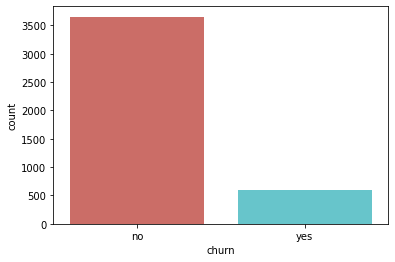

In [12]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.countplot(x='churn',data=dataset,palette='hls')
plt.show()

#Checking for Null Values

In [13]:
dataset.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

#Dropping the Id in the test dataset

In [14]:
#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, -1].values
#m,n=X.shape

test_data=test_dataset.iloc[:,1:]

In [15]:
test_data.shape

(750, 19)

In [16]:
test_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


#Label Encoding on Categorical Features

In [17]:
from sklearn.preprocessing import LabelEncoder
def encode(i):
  le = LabelEncoder()
  dataset[i]=le.fit_transform(dataset[i])


for i in dataset:
  if(dataset[i].dtype==object):
    encode(i)




In [18]:
from sklearn.preprocessing import LabelEncoder
def encode2(i):
  le = LabelEncoder()
  test_data[i]=le.fit_transform(test_data[i])

for i in test_data:
  if(test_data[i].dtype==object):
    encode2(i)



In [19]:
test_data.shape

(750, 19)

#Checking Correlation in the data

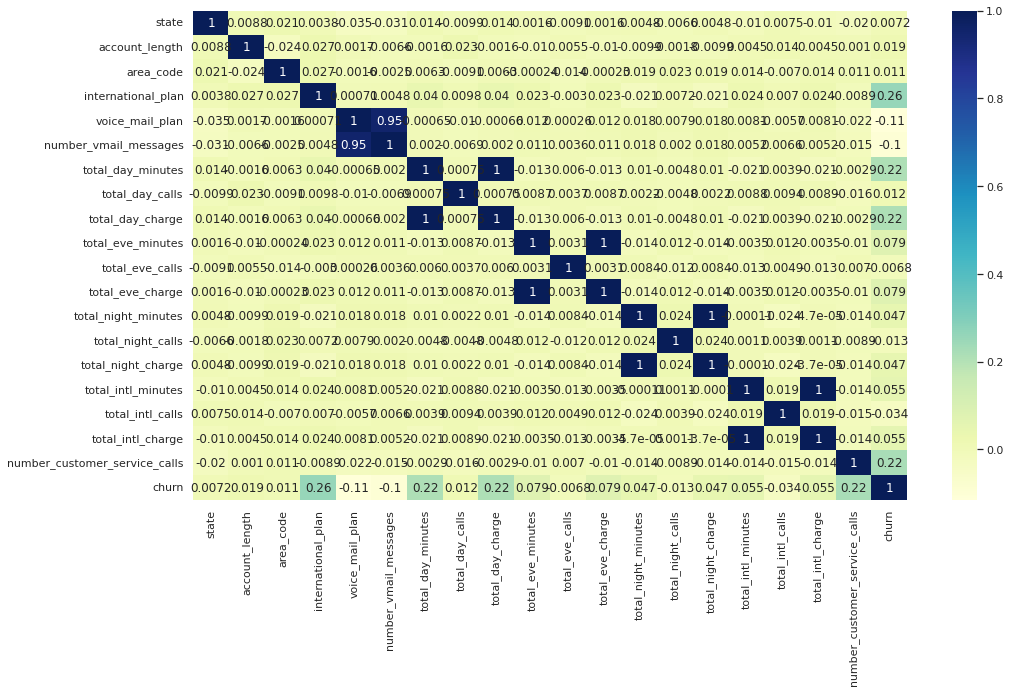

In [20]:
import matplotlib.pyplot as plt
import seaborn as sb
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
#print(dataset.corr())
  
# plotting correlation heatmap
plt.figure(figsize=(16,9))
sb.set()
dataplot = sb.heatmap(dataset.corr(method='pearson'), cmap="YlGnBu", annot=True)
  
plt.show()

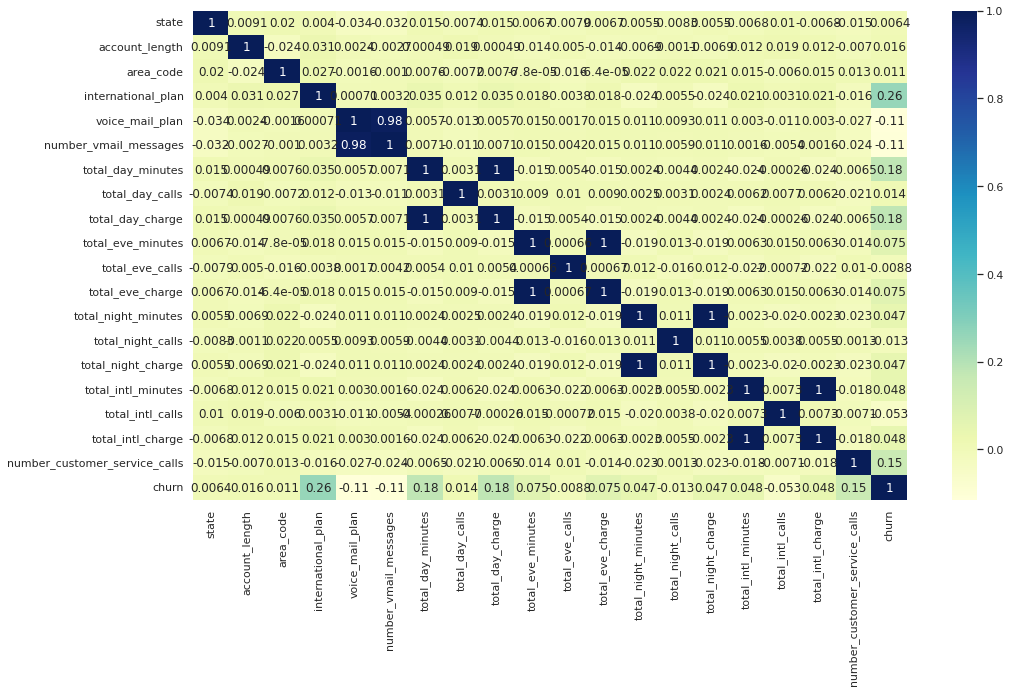

In [21]:

# displaying heatmap
plt.figure(figsize=(16,9))
sb.set()
dataplot = sb.heatmap(dataset.corr(method='spearman'), cmap="YlGnBu", annot=True)
  
plt.show()

In [22]:
def corr_features(corr_df,threshold):
  arr=corr_df.to_numpy()
  feat=set()
  for i in range(len(arr)):
    for j in range(len(arr)):
      if(j>i):
        if(arr[i,j]>=threshold or arr[i,j]<=-threshold):
         feat.add(corr_df.columns[j])
  return feat

In [23]:
corr_df=dataset.corr(method="spearman")
feat=corr_features(corr_df,0.65)
print(feat)

{'number_vmail_messages', 'total_eve_charge', 'total_day_charge', 'total_night_charge', 'total_intl_charge'}


#Dropping correlated Features

In [24]:
dataset=dataset.drop('total_intl_charge',axis=1)
dataset=dataset.drop('total_day_charge',axis=1)
dataset=dataset.drop('total_eve_charge',axis=1)
#dataset=dataset.drop('number_vmail_messages',axis=1)
dataset=dataset.drop('total_night_charge',axis=1)


In [25]:
#test_data=test_data.drop('total_intl_charge',axis=1)
test_data=test_data.drop('total_day_charge',axis=1)
#test_data=test_data.drop('total_eve_charge',axis=1)
#test_data=test_data.drop('number_vmail_messages',axis=1)
#test_data=test_data.drop('total_night_charge',axis=1)


In [26]:
test_data.shape

(750, 18)

In [27]:
dataset.shape

(4250, 16)

#Spliting dataset according to dependent and independent features

In [28]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
m,n=X.shape

#Splitting the dataset into the Training set and Test set

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Training the Random Forest Classifier model on the Training set

In [30]:
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state = 1)
#classifier.fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 1)
classifier.fit(X_train, y_train)
#from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors = 100, metric = 'minkowski', p = 2)
#classifier.fit(X_train, y_train)
#from sklearn.naive_bayes import GaussianNB
#classifier = GaussianNB()
#classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=1)

#Saving the Model

In [31]:
import joblib
#saving the model to the Disk
file_name='customer_churn'
joblib.dump(classifier,file_name)

['customer_churn']

#Loading the Modelfrom the Disk

In [32]:
import joblib
#loading the model from Disk
loaded_model=joblib.load('/content/customer_churn')

#Predicting the Test Results

In [33]:
y_pred = loaded_model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


#Making Confusion Matrix and calculating accuracy

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
#confusion matrix
print(cm)
#calculating the accuracy score of the model
print("accuracy")
print((accuracy_score(y_test, y_pred)*100))


[[921   2]
 [ 40 100]]
accuracy
96.04891815616182


#Predicting results for Test data file

In [35]:
pred = classifier.predict(test_data)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print(pred)
print(test_data.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ValueError: ignored

In [ ]:
pred1=[]
for i in pred:
  if(i==0):
    pred1.append('no')
  else:
    pred1.append('yes')

In [ ]:

pred1=(np.array(pred1))
print(pred1)

#Predicted results file with an accuracy of 97.7% in Kaggle competition

In [ ]:
dict1={"id":[],
       "churn":[]}
submit=pd.DataFrame(dict1)
submit.shape
#select=df11[["Id"]]
#submit=select.copy()
submit["id"]=test_dataset["id"]
submit["churn"]=pred1
print(submit.shape)
submit.to_csv('submit1.csv',index=False)